In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
# Download historical data for ticker AAPL
aapl_df = yf.download('AAPL', start='2021-06-07', end='2023-06-07')

# Check for missing values
#print(aapl_df.isnull().sum())

# Remove rows with missing values
#aapl_df = aapl_df.dropna()

# Apple Stock Data
print(aapl_df.head())


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-07  126.169998  126.320000  124.830002  125.900002  124.441727   
2021-06-08  126.599998  128.460007  126.209999  126.739998  125.271988   
2021-06-09  127.209999  127.750000  126.519997  127.129997  125.657478   
2021-06-10  127.019997  128.190002  125.940002  126.110001  124.649284   
2021-06-11  126.529999  127.440002  126.099998  127.349998  125.874924   

              Volume  
Date                  
2021-06-07  71057600  
2021-06-08  74403800  
2021-06-09  56877900  
2021-06-10  71186400  
2021-06-11  53522400  


In [7]:
# Download historical data for ticker AAPL
aapl_df = yf.download('AAPL', start="2021-06-07", end="2023-06-07")

# Check the data
aapl_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-07,126.169998,126.320000,124.830002,125.900002,124.441719,71057600
2021-06-08,126.599998,128.460007,126.209999,126.739998,125.271980,74403800
2021-06-09,127.209999,127.750000,126.519997,127.129997,125.657471,56877900
2021-06-10,127.019997,128.190002,125.940002,126.110001,124.649277,71186400
2021-06-11,126.529999,127.440002,126.099998,127.349998,125.874924,53522400


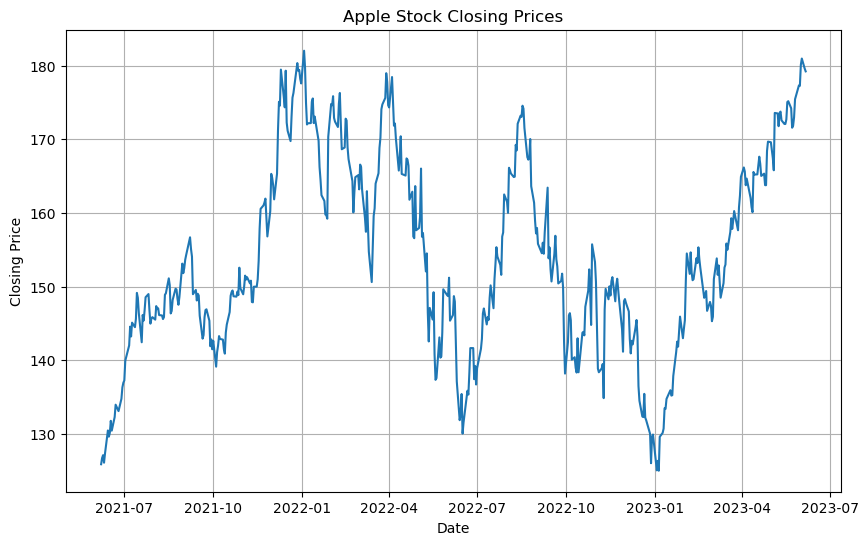

In [16]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(aapl_df.index, aapl_df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple Stock Closing Prices')
plt.grid(True)
plt.show()

In [9]:
# Calculate the 20-day EMA
ema_20 = aapl_df['Close'].ewm(span=20, adjust=False).mean()

# Calculate the 50-day EMA
ema_50 = aapl_df['Close'].ewm(span=50, adjust=False).mean()


In [10]:
# Generate crossover signals
bullish_crossover = (ema_20 > ema_50) & (ema_20.shift() < ema_50.shift())
bearish_crossover = (ema_20 < ema_50) & (ema_20.shift() > ema_50.shift())


In [13]:
# Generate entry and exit signals
buy_signals = aapl_df[bullish_crossover].index
sell_signals = aapl_df[bearish_crossover].index


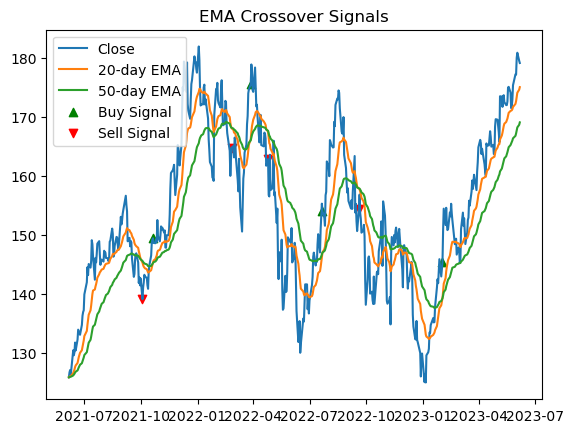

In [15]:
# Plotting the closing price
plt.plot(aapl_df['Close'], label='Close')

# Plotting the EMAs
plt.plot(ema_20, label='20-day EMA')
plt.plot(ema_50, label='50-day EMA')

# Plotting the crossover signals
plt.scatter(buy_signals, aapl_df.loc[buy_signals, 'Close'], color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals, aapl_df.loc[sell_signals, 'Close'], color='red', marker='v', label='Sell Signal')

# Adding legend and title
plt.legend()
plt.title('EMA Crossover Signals')

# Display the plot
plt.show()
